In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [11]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['fare_mean'] = X_train['Age'].fillna(mean_fare)


In [12]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
469,0.75,NaN,3,0.75,0.750000,14.40,0.750000
460,48.00,26.55,0,48.00,48.000000,26.55,48.000000
405,34.00,21.00,1,34.00,34.000000,21.00,34.000000
121,NaN,8.05,0,28.00,29.498846,8.05,32.517788
863,NaN,69.55,10,28.00,29.498846,69.55,32.517788


In [13]:
print('Original Age variable variance : ', X_train['Age'].var())
print('Age Variance after median imputation : ', X_train['Age_median'].var())
print('Age Variance after mean imputation : ', X_train['Age_mean'].var())

print('Original Fare variable variance : ', X_train['Fare'].var())
print('Fare Variance after median imputation : ', X_train['fare_median'].var())
print('Fare Variance after mean imputation : ', X_train['fare_mean'].var())


Original Age variable variance :  210.2517072477438
Age Variance after median imputation :  169.20731007048096
Age Variance after mean imputation :  168.8519336687225
Original Fare variable variance :  2761.031434948639
Fare Variance after median imputation :  2637.01248167777
Fare Variance after mean imputation :  170.29366350002152


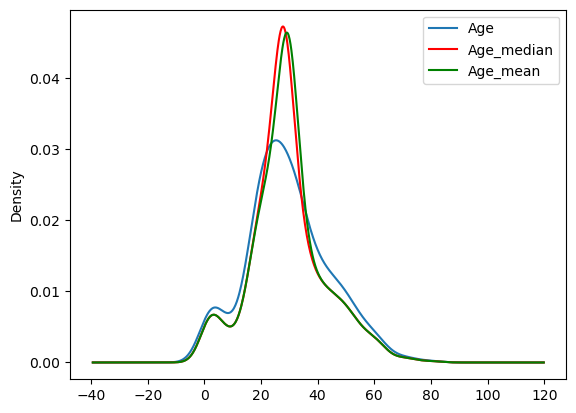

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

#add_legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

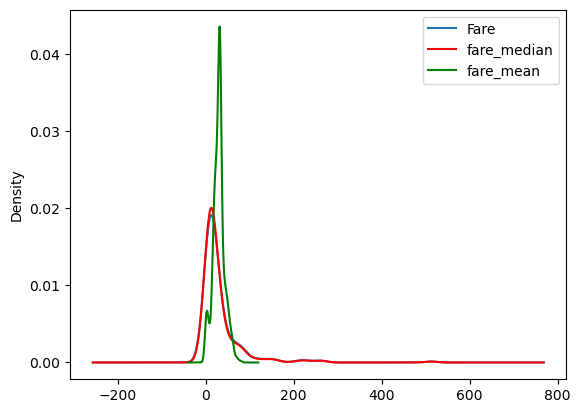

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with mean
X_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

#add_legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
# Checking the covariance
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,210.251707
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,52.745200
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,-5.673883
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,168.136143
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,168.851934
fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,49.341680
fare_mean,210.251707,52.745200,-5.673883,168.136143,168.851934,49.341680,170.293664


In [17]:
# Checking the correlation
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,1.000000
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,0.076859
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,-0.258416
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.990495
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.995758
fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.073631
fare_mean,1.000000,0.076859,-0.258416,0.990495,0.995758,0.073631,1.000000


<Axes: >

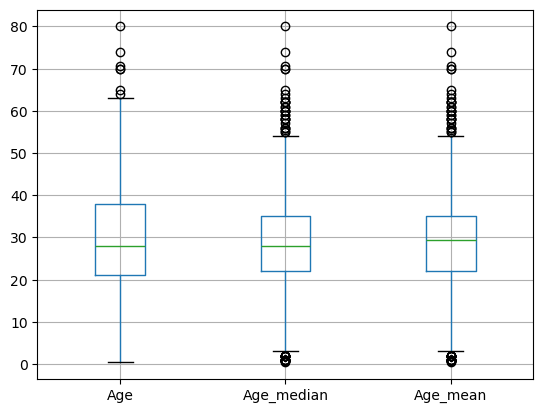

In [18]:
# Plotting the boxplot for Age column
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

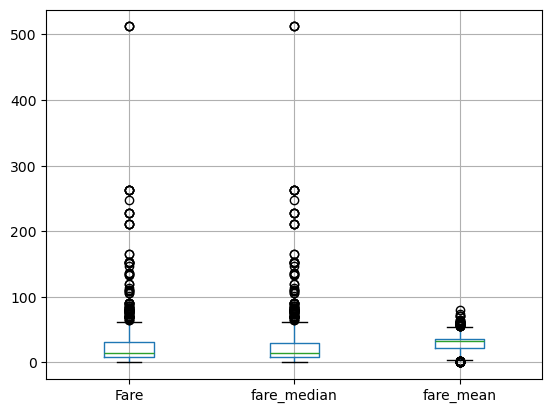

In [19]:
# Plotting the boxplot for fare column
X_train[['Fare', 'fare_median', 'fare_mean']].boxplot()

## Mean-Median imputation using sklearn

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [21]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [22]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [23]:
trf.fit(X_train)

c:\Users\Rafy Mustafa\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [24]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [25]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [26]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [27]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])